# Gender prediction using face recogniton

<img src="http://download.acti.com/corpweb/DownloadCenter/Ajax/MakeThumbImage.ashx?id=18080" width='300' height='700' /> 

### **Explanation :**
***This is project is aimed to predict a persons gender(male,female) from a video or real time camera.Gender detection is essential for authentication, human-computer interaction, behavior analysis, product recommendation based on user preferences, and many other areas.***


**There are multiple steps in this project**

- Importing all required libraries
- Introducing data
- Preprocessing data
- Building a model
- Training & Test
- Vizualization
- Deployment *[The next notebook]*

### Libraries

In [11]:
# downloading files
import os
import glob
# Vizualization               
import matplotlib.pyplot as plt      
import seaborn as sb
#Resizing data
import cv2
import numpy as np                            
# for building model                 
from tensorflow import keras

***Check if graphics card(GPU) is available***

In [2]:
tf.config.list_physical_devices()   

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### Uploading data

In [3]:
train_path = r"C:\\Users\\USER\\31-Github projects\\gender_detection\\dataset\\genders\\train\\"
test_path = r"C:\\Users\\USER\\31-Github projects\\gender_detection\\dataset\\genders\\test\\"

**Data is divided into 2 train and test files. Both files also devided into 2 seperate male and female files.**

**Train : *47,000* images .jpg format**

**Test :  *11,650* images .jpg format**

In [4]:
def dataset(path):
    x_train,y_train= [],[]
    for index in range(2):
        labels = ['female','male'] 
        path_new = path + labels[index] + '\\*' # creating file directory
        for image in glob.glob(path_new): # sends image file one by one 
            image = cv2.imread(image) 
            image = cv2.resize(image,(96,96)) # resize by (96,96) was chosen regarding to the all images
            x_train.append(image) # creating a Tensor for image tensors 
            # encoding labels and add to the array
            if index==0: 
                y_train.append([1,0]) #female
            else: 
                y_train.append([0,1]) # male
    return x_train,y_train

In [5]:
X_train,y_train = dataset(train_path)

> **Remember to turn data into numpy arrays**

In [6]:
def preprocess(X,Y):
    # to_numpy
    X = np.array(X)
    Y = np.array(Y) 
    X = X/255.0 # this operation scales the pixel values from the original range of [0, 255] to a normalized range of [0.0, 1.0]
    X = X.astype('float32') # Standardizing the data type to ["float32" or "uint32"] ensure consistency, efficiency                      
    Y = Y.astype("uint32") # and compatibility with various platforms and hardware.
    return X,Y

In [7]:
X_train,y_train = preprocess(X_train,y_train)

### Vizualization

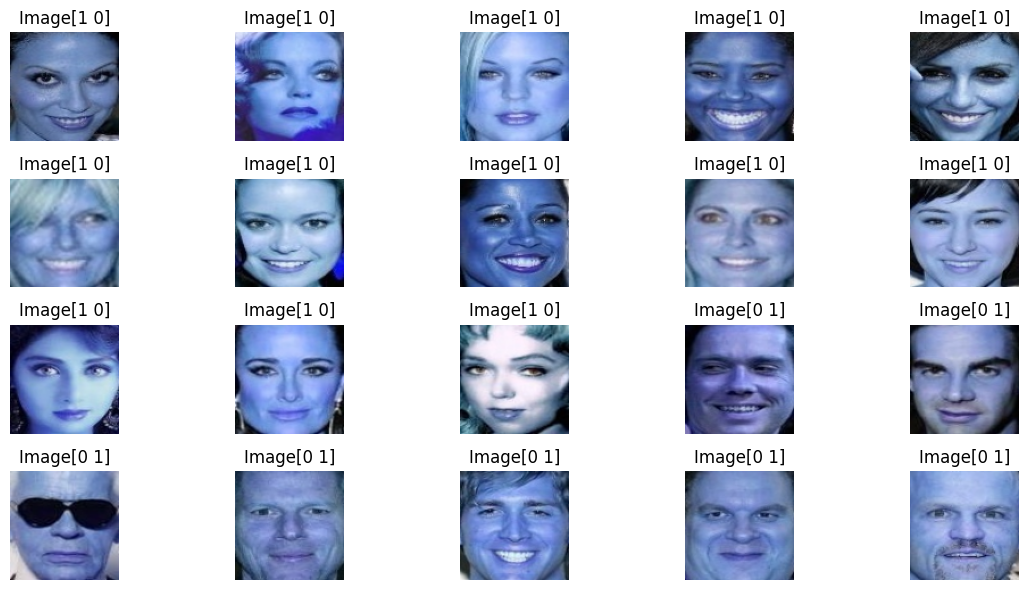

In [8]:
start=23230
end=start+20
images = X_train[start:end]
labels = y_train[start:end]
fig, axes = plt.subplots(4,5,figsize=(12, 6)) # output format images 2:5
axes = axes.flatten()
for i in range(len(images)):
    ax = axes[i]
    ax.imshow(images[i],cmap='gray')  # Assuming grayscale images
    ax.axis('off')  # Turn off the axis labels and ticks
    ax.set_title(f"Image{labels[i]}")
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

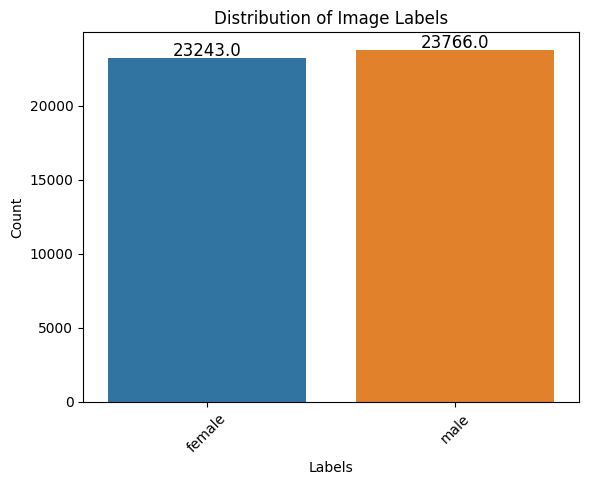

In [12]:
count=[]
from  warnings import filterwarnings as warns
warns('ignore')
for i in y_train:
    if i.argmax()==0:
        count.append("female")
    else:
        count.append("male")
ax=sb.countplot(x=count)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Image Labels')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=45)
plt.show()

In [13]:
X_train.shape

(47009, 96, 96, 3)

### Model building
**I built a Sequential CNN model to classify the data**

In [28]:
model = keras.Sequential([
     keras.layers.Conv2D(32,(3,3),activation='relu',strides=2,padding='same',input_shape=(96,96,3),name='conv_1'), # layer= conv  
     keras.layers.BatchNormalization(axis=-1,momentum=0.9,name="batch_1"),                                  #filters=32  kernel_size=3x3/strides=2
    
     keras.layers.Conv2D(32,(1,1),strides=2,activation='relu',padding='same',name='conv_2'),  # conv321x1/2 
     keras.layers.BatchNormalization(axis=-1,momentum=0.9,name="batch_2"),
    
     keras.layers.MaxPooling2D((2,2)), # Maxpooling 2x2
    
     keras.layers.Conv2D(64,(3,3),strides=2,activation='relu',padding='same',name='conv_3'), # conv64 3x3/2 
     keras.layers.BatchNormalization(axis=-1,momentum=0.9,name="batch_3"),
    
     keras.layers.Conv2D(128,(3,3),strides=2,activation='relu',name='conv_4'),  # conv128 3x3/2 
     keras.layers.BatchNormalization(axis=-1,momentum=0.9,name="batch_4"),

     keras.layers.Conv2D(64,(1,1),strides=1,activation='relu',name='conv_5'),
     keras.layers.BatchNormalization(axis=-1,momentum=0.9,name="batch_5"),
    
     keras.layers.AveragePooling2D((2,2)),
     keras.layers.Flatten(),
    
     keras.layers.BatchNormalization(),
     keras.layers.Dense(64,activation='relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(32,activation='relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(2,activation='sigmoid'),
     
    ],name='Gender_detection')
model.summary()

Model: "Gender_detection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_1 (BatchNormalizatio  (None, 48, 48, 32)        128       
 n)                                                              
                                                                 
 conv_2 (Conv2D)             (None, 24, 24, 32)        1056      
                                                                 
 batch_2 (BatchNormalizatio  (None, 24, 24, 32)        128       
 n)                                                              
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                  

#### **Model should be compiled before training.When you compile a model, you are configuring its learning process, specifying important settings that affect how the model will learn and how it will be trained.**

In [29]:
adam_opt = keras.optimizers.Adam(learning_rate=0.001) #commonly used optimizer is Adam with learning rate is 0.001 to avoid underfitting
model.compile(optimizer=adam_opt,loss='binary_crossentropy',metrics=['accuracy']) #Use this loss function because there are only 2 classes

## Training 

In [22]:
from sklearn.model_selection import train_test_split as T_split 
train_data,valid_data,train_label,valid_label = T_split(X_train,y_train,test_size=0.2,random_state=42) #split data into train and validation

In [30]:
# Callback function is used to avoid time wasting.It stops the training of our model if it's  or accuracy reaches the point
# which we need we ourselves give the  border to stop
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get("accuracy")>0.97):
            print("\n accuracy reached the highest point,cancelling session")
            self.model.stop_training=True
callback = myCallback()

In [31]:
epochs=100 # number of training sessions
batch_sizes=64 # number of elements learnt in per session of every epoch 

#### Training process is uploaded to **history** variable , later this **history** is used to vizualize the process

In [32]:
history = model.fit(train_data,train_label,validation_data=(valid_data,valid_label),epochs=epochs, batch_size=batch_sizes,callbacks=callback)

Epoch 1/100
588/588 [==============================] - 54s 88ms/step - loss: 0.2644 - accuracy: 0.8929 - val_loss: 0.2287 - val_accuracy: 0.9095
Epoch 2/100
588/588 [==============================] - 51s 87ms/step - loss: 0.1684 - accuracy: 0.9357 - val_loss: 0.1693 - val_accuracy: 0.9340
Epoch 3/100
588/588 [==============================] - 51s 88ms/step - loss: 0.1443 - accuracy: 0.9456 - val_loss: 0.1576 - val_accuracy: 0.9394
Epoch 4/100
588/588 [==============================] - 52s 88ms/step - loss: 0.1274 - accuracy: 0.9513 - val_loss: 0.1570 - val_accuracy: 0.9419
Epoch 5/100
588/588 [==============================] - 52s 88ms/step - loss: 0.1148 - accuracy: 0.9568 - val_loss: 0.1587 - val_accuracy: 0.9420
Epoch 6/100
588/588 [==============================] - 53s 90ms/step - loss: 0.1031 - accuracy: 0.9612 - val_loss: 0.1568 - val_accuracy: 0.9417
Epoch 7/100
588/588 [==============================] - 51s 86ms/step - loss: 0.0933 - accuracy: 0.9656 - val_loss: 0.1575 - val_ac

In [ ]:
def plotting(hist):
    plt.plot(hist.history["accuracy"],'r')
    plt.plot(hist.history["loss"],'y')
    plt.title("Train accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["validation","validation_loss"], loc="best")
    plt.show()
plotting(history)

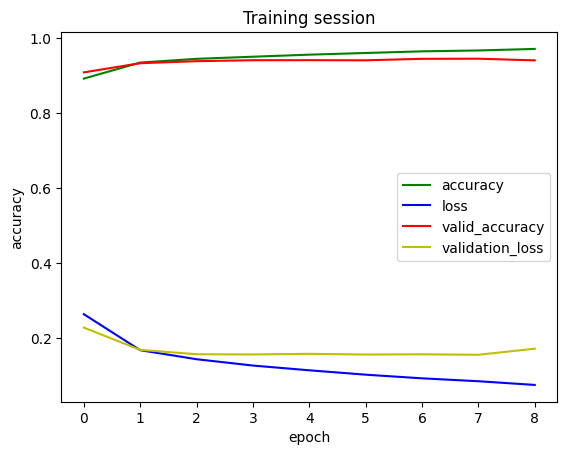

In [35]:
def plotting(hist):
    plt.plot(hist.history["accuracy"],'g')
    plt.plot(hist.history["loss"],'b')
    plt.plot(hist.history["val_accuracy"],'r')
    plt.plot(hist.history["val_loss"],'y') 
    plt.title("Training session")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["accuracy","loss","valid_accuracy","validation_loss",], loc="best")
    plt.show()
plotting(history)

### Test

In [37]:
x_test,y_test = dataset(test_path) # The same method is applied to test which was used for training section 
x_test,y_test = preprocess(x_test,y_test)

In [40]:
evaluation = model.evaluate(x_test,y_test)
print(f"test accuracy shows that accuracy rate is around {np.round(evaluation[1]*100)} %")

365/365 [==============================] - 4s 12ms/step - loss: 0.1438 - accuracy: 0.9471
test accuracy shows that accuracy rate is around 95.0 %


#### Save model as **json** format to use it anytime 

In [42]:
import json
json_model = model.to_json()
with open('gen_det_model.json', 'w') as json_file:
    json_file.write(json_model)